<a href="https://colab.research.google.com/github/faddednatasha/Brazilian-E-Commerce-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
customers=pd.DataFrame(pd.read_csv('customers_dataset.csv'))
geolocation=pd.DataFrame(pd.read_csv('geolocation_dataset.csv'))
order_item=pd.DataFrame(pd.read_csv('orders_dataset.csv'))
order_payment=pd.DataFrame(pd.read_csv('payments_dataset.csv'))
order_reviews=pd.DataFrame(pd.read_csv('reviews_dataset.csv'))
orders=pd.DataFrame(pd.read_csv('orders_dataset.csv'))
products=pd.DataFrame(pd.read_csv('products_dataset.csv'))
sellers=pd.DataFrame(pd.read_csv('sellers_dataset.csv'))
category_trans=pd.DataFrame(pd.read_csv('product_category_name.csv'))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# **Data Cleaning**

## Customers Dataset

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customers.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
customers.duplicated().sum()

np.int64(0)

##Geolocation Dataset

In [ ]:
geolocation.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
geolocation.shape

(1000163, 5)

In [ ]:
geolocation.duplicated().sum()

np.int64(261831)

In [ ]:
geolocation=geolocation.drop_duplicates()

In [ ]:
geolocation=geolocation.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat':'mean','geolocation_lng':'mean',
                                                                    'geolocation_city':'first','geolocation_state':'first'})

In [ ]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19015 entries, 1001 to 99990
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   geolocation_lat    19015 non-null  float64
 1   geolocation_lng    19015 non-null  float64
 2   geolocation_city   19015 non-null  object 
 3   geolocation_state  19015 non-null  object 
dtypes: float64(2), object(2)
memory usage: 742.8+ KB


##Orderitem Dataset

In [ ]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
order_item['order_purchase_timestamp']=pd.to_datetime(order_item['order_purchase_timestamp'],errors='coerce')

In [ ]:
order_item.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
order_item.duplicated().sum()

np.int64(0)

##Order Payment Dataset

In [ ]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_payment.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
order_payment.duplicated().sum()

np.int64(0)

In [ ]:
order_payment["payment_type"] = order_payment["payment_type"].replace("boleto", "bank_slip")

In [ ]:
# A payment_type is not_defined if the order was not approved
unknown_pays = order_payment[order_payment['payment_type']=='not_defined']
unknown_pays = unknown_pays.loc[:,'order_id'].tolist()
unknowns = orders[orders['order_id'].isin(unknown_pays)]
print(unknowns.shape[0])

# We can drop cancelled orders since they are very small and our EDA is not for it
order_payment = order_payment[order_payment['payment_type'] != 'not_defined']
orders = orders[~orders['order_id'].isin(unknown_pays)]
order_payment.shape[0]

3


103883

##Order Reviews Dataset

In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews['review_creation_date']=pd.to_datetime(order_reviews['review_creation_date'],errors='coerce')
order_reviews['review_answer_timestamp']=pd.to_datetime(order_reviews['review_answer_timestamp'],errors='coerce')

In [ ]:
order_reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


##Order Dataset

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99438 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99438 non-null  object
 1   customer_id                    99438 non-null  object
 2   order_status                   99438 non-null  object
 3   order_purchase_timestamp       99438 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99438 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


In [ ]:
date_cols = ["order_purchase_timestamp","order_approved_at",
             "order_delivered_carrier_date",
             "order_delivered_customer_date",
             "order_estimated_delivery_date"]

for col in date_cols:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')

In [ ]:
invalid_orders = orders[
    (orders['order_approved_at'] < orders['order_purchase_timestamp']) |
    (orders['order_delivered_carrier_date'] < orders['order_approved_at']) |
    (orders['order_delivered_customer_date'] < orders['order_delivered_carrier_date']) |
    (orders['order_estimated_delivery_date'] < orders['order_purchase_timestamp'])
]

invalid_orders['order_delivered_customer_date'].info()

<class 'pandas.core.series.Series'>
Index: 1382 entries, 15 to 99406
Series name: order_delivered_customer_date
Non-Null Count  Dtype         
--------------  -----         
1373 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.6 KB


In [ ]:
null_orders = invalid_orders[invalid_orders['order_delivered_customer_date'].isnull()]
invalid_orders = invalid_orders.drop(null_orders.index)
invalid_orders.info()
orders = orders.drop(invalid_orders.index).reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1373 entries, 15 to 99406
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       1373 non-null   object        
 1   customer_id                    1373 non-null   object        
 2   order_status                   1373 non-null   object        
 3   order_purchase_timestamp       1373 non-null   datetime64[ns]
 4   order_approved_at              1373 non-null   datetime64[ns]
 5   order_delivered_carrier_date   1373 non-null   datetime64[ns]
 6   order_delivered_customer_date  1373 non-null   datetime64[ns]
 7   order_estimated_delivery_date  1373 non-null   datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 96.5+ KB


In [ ]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,157
order_delivered_carrier_date,1780
order_delivered_customer_date,2962
order_estimated_delivery_date,0


In [ ]:
orders.duplicated().sum()

np.int64(0)

##Products Dataset

In [ ]:
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products['product_photos_qty']=products['product_photos_qty'].fillna(products['product_photos_qty'].mode()[0])

In [ ]:
products['product_name_lenght']=products['product_name_lenght'].fillna(products['product_name_lenght'].mode()[0])

In [ ]:
products['product_description_lenght']=products['product_description_lenght'].fillna(products['product_description_lenght'].mode()[0])

In [ ]:
cols=['product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in cols:
    products[col]=products[col].fillna(products[col].mode()[0])

In [ ]:
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


##Seller Dataset

In [ ]:
sellers.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
sellers.duplicated().sum()

np.int64(0)

##Category Translated Dataset

In [ ]:
category_trans.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
category_trans.duplicated().sum()

np.int64(0)

##Merging the Dataset

In [ ]:
customers_geo=customers.merge(geolocation, how='left',left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [ ]:
customers_geo

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.499273,-47.396658,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.728396,-46.542250,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531309,-46.656690,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.500670,-46.186348,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975708,-47.143140,campinas,SP
...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,-23.586179,-46.499652,são paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,-23.616789,-46.767716,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,-3.735628,-38.510775,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,-29.949964,-51.168380,canoas,RS


In [ ]:
customers_geo=customers_geo.drop(['geolocation_city','geolocation_state'],axis=1)
customers_geo.sort_values(by="customer_zip_code_prefix", inplace=True)
customers_geo.ffill(inplace=True)

In [ ]:
customers_geo.duplicated().sum()

np.int64(0)

In [ ]:
customers_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99441 entries, 23914 to 25752
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               99441 non-null  object 
 1   customer_unique_id        99441 non-null  object 
 2   customer_zip_code_prefix  99441 non-null  int64  
 3   customer_city             99441 non-null  object 
 4   customer_state            99441 non-null  object 
 5   geolocation_lat           99441 non-null  float64
 6   geolocation_lng           99441 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.1+ MB


In [ ]:
order_detailed=orders.merge(order_item,how="left", on="order_id", validate="1:m")
order_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98065 entries, 0 to 98064
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   order_id                         98065 non-null  object        
 1   customer_id_x                    98065 non-null  object        
 2   order_status_x                   98065 non-null  object        
 3   order_purchase_timestamp_x       98065 non-null  datetime64[ns]
 4   order_approved_at_x              97908 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   96285 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  95103 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  98065 non-null  datetime64[ns]
 8   customer_id_y                    98065 non-null  object        
 9   order_status_y                   98065 non-null  object        
 10  order_purchase_timestamp_y       98065 non-null  datetime6

In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
order_detailed=order_detailed.merge(order_payment,how='left',on='order_id')
order_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102460 entries, 0 to 102459
Data columns (total 19 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         102460 non-null  object        
 1   customer_id_x                    102460 non-null  object        
 2   order_status_x                   102460 non-null  object        
 3   order_purchase_timestamp_x       102460 non-null  datetime64[ns]
 4   order_approved_at_x              102288 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   100575 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  99331 non-null   datetime64[ns]
 7   order_estimated_delivery_date_x  102460 non-null  datetime64[ns]
 8   customer_id_y                    102460 non-null  object        
 9   order_status_y                   102460 non-null  object        
 10  order_purchase_timestamp_y       102460 non-

In [ ]:
order_detailed=order_detailed.merge(order_reviews, how='left',on='order_id')
order_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103049 entries, 0 to 103048
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         103049 non-null  object        
 1   customer_id_x                    103049 non-null  object        
 2   order_status_x                   103049 non-null  object        
 3   order_purchase_timestamp_x       103049 non-null  datetime64[ns]
 4   order_approved_at_x              102876 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   101154 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  99898 non-null   datetime64[ns]
 7   order_estimated_delivery_date_x  103049 non-null  datetime64[ns]
 8   customer_id_y                    103049 non-null  object        
 9   order_status_y                   103049 non-null  object        
 10  order_purchase_timestamp_y       103049 non-

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
import pandas as pd

# Assuming 'tems_dataset.csv' contains the order item details including 'product_id'
# Load the order items data
order_items_details = pd.DataFrame(pd.read_csv('tems_dataset.csv'))

# Merge order_detailed with order_items_details to introduce 'product_id' into order_detailed
# Handle potential duplicate columns after merge by dropping them later or specifying a subset.
# For now, let's assume we want to bring in all columns and then manage potential duplicates.
# The 'validate="1:m"' is removed from the previous merge with order_item if it's not applicable here.
order_detailed = order_detailed.merge(order_items_details, how='left', on='order_id', suffixes=('_order_main', '_item_details'))

# Now that 'order_detailed' contains 'product_id', merge it with the 'products' DataFrame
order_detailed = order_detailed.merge(products, how='left', on='product_id', suffixes=('_item_details', '_product'))
order_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117488 entries, 0 to 117487
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         117488 non-null  object        
 1   customer_id_x                    117488 non-null  object        
 2   order_status_x                   117488 non-null  object        
 3   order_purchase_timestamp_x       117488 non-null  datetime64[ns]
 4   order_approved_at_x              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   115405 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  114070 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  117488 non-null  datetime64[ns]
 8   customer_id_y                    117488 non-null  object        
 9   order_status_y                   117488 non-null  object        
 10  order_purchase_timestamp_y       117488 non-

In [ ]:
category_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
order_detailed=order_detailed.merge(category_trans,how='left',on='product_category_name')

In [ ]:
order_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117488 entries, 0 to 117487
Data columns (total 40 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         117488 non-null  object        
 1   customer_id_x                    117488 non-null  object        
 2   order_status_x                   117488 non-null  object        
 3   order_purchase_timestamp_x       117488 non-null  datetime64[ns]
 4   order_approved_at_x              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   115405 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  114070 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  117488 non-null  datetime64[ns]
 8   customer_id_y                    117488 non-null  object        
 9   order_status_y                   117488 non-null  object        
 10  order_purchase_timestamp_y       117488 non-

In [ ]:
order_detailed=order_detailed.merge(sellers,how='left',on='seller_id')

In [ ]:
order_detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117488 entries, 0 to 117487
Data columns (total 43 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         117488 non-null  object        
 1   customer_id_x                    117488 non-null  object        
 2   order_status_x                   117488 non-null  object        
 3   order_purchase_timestamp_x       117488 non-null  datetime64[ns]
 4   order_approved_at_x              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   115405 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  114070 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  117488 non-null  datetime64[ns]
 8   customer_id_y                    117488 non-null  object        
 9   order_status_y                   117488 non-null  object        
 10  order_purchase_timestamp_y       117488 non-

In [ ]:
combined=order_detailed.merge(customers,how="inner", left_on="customer_id_x", right_on="customer_id")

In [ ]:
combined.shape

(117488, 48)

In [ ]:
combined.duplicated().sum()

np.int64(0)

In [ ]:
combined.isnull().sum()

,0
order_id,0
customer_id_x,0
order_status_x,0
order_purchase_timestamp_x,0
order_approved_at_x,174
order_delivered_carrier_date_x,2083
order_delivered_customer_date_x,3418
order_estimated_delivery_date_x,0
customer_id_y,0
order_status_y,0


In [ ]:
print("\nOrders before merge:", orders.shape[0])
print("Orders after merge:", combined['order_status_x'].notna().sum())

print("Unique customers before merge:", customers['customer_unique_id'].nunique())
print("Unique customers after merge:", combined['customer_unique_id'].nunique())

print("\nUnique sellers:", combined['seller_id'].nunique())
print("Unique products:", combined['product_category_name_english'].nunique())
print("Unique payment types:", combined['payment_type'].nunique())


Orders before merge: 98065
Orders after merge: 117488
Unique customers before merge: 96096
Unique customers after merge: 94785

Unique sellers: 3084
Unique products: 71
Unique payment types: 4


In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117488 entries, 0 to 117487
Data columns (total 48 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         117488 non-null  object        
 1   customer_id_x                    117488 non-null  object        
 2   order_status_x                   117488 non-null  object        
 3   order_purchase_timestamp_x       117488 non-null  datetime64[ns]
 4   order_approved_at_x              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   115405 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  114070 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  117488 non-null  datetime64[ns]
 8   customer_id_y                    117488 non-null  object        
 9   order_status_y                   117488 non-null  object        
 10  order_purchase_timestamp_y       117488 non-

#EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
order_status_count=combined.groupby('order_status_x')["order_status_x"].count()
combined['order_purchase_day']=combined['order_purchase_timestamp_x'].dt.to_period("D").dt.to_timestamp()
combined['order_purchase_month']=combined['order_purchase_timestamp_x'].dt.to_period("M").dt.to_timestamp()

In [ ]:
daily_order=combined.groupby('order_purchase_day').size().reset_index(name="count")
monthly_orders=combined.groupby('order_purchase_month').size().reset_index(name="count")

In [ ]:
daily_order=combined.groupby('order_purchase_day').size().reset_index(name="count")
monthly_orders=combined.groupby('order_purchase_month').size().reset_index(name="count")

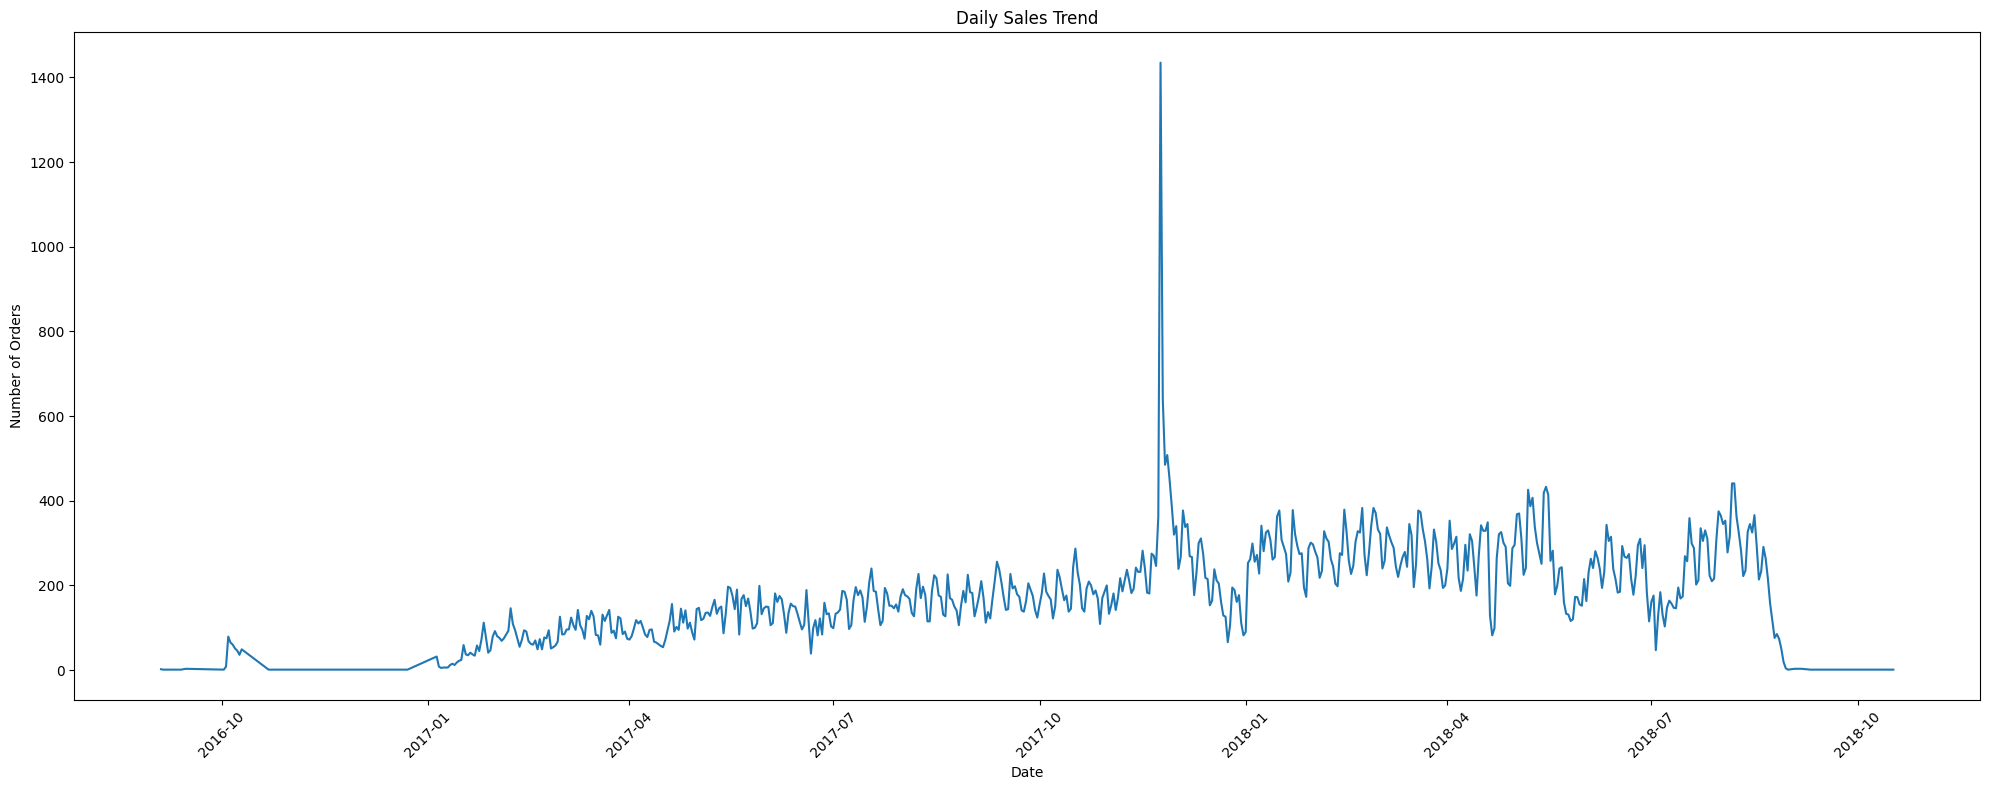

In [ ]:
# Daily Order Trend
plt.figure(figsize=(20,8))
sns.lineplot(x='order_purchase_day',y='count',data=daily_order)
plt.tick_params(axis="x", rotation=45)
plt.title("Daily Sales Trend")
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.tight_layout()

In [ ]:
combined["order_day_name"] = combined["order_purchase_timestamp_x"].dt.day_name()
combined["order_month"] = combined["order_purchase_timestamp_x"].dt.month_name()
combined["order_day_of_week"] = combined["order_purchase_timestamp_x"].dt.dayofweek

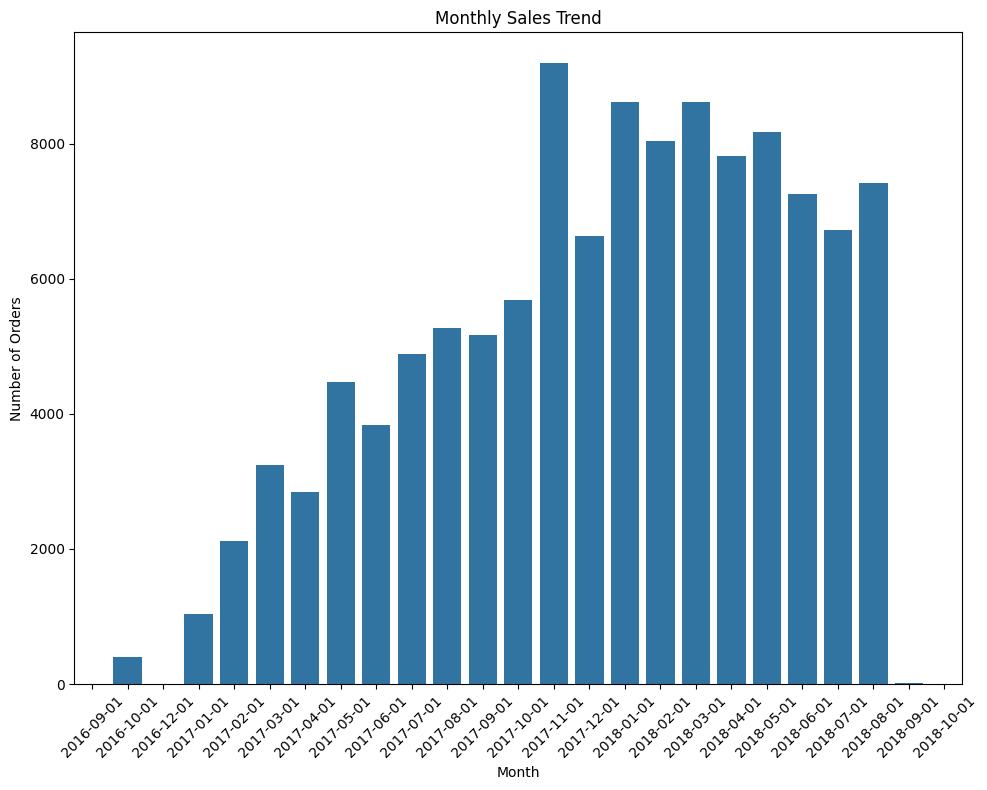

In [ ]:
# Monthly Order Trend
plt.figure(figsize=(10,8))
sns.barplot(x='order_purchase_month',y='count',data=monthly_orders)
plt.tick_params(axis="x", rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.tight_layout()

In [ ]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117488 entries, 0 to 117487
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         117488 non-null  object        
 1   customer_id_x                    117488 non-null  object        
 2   order_status_x                   117488 non-null  object        
 3   order_purchase_timestamp_x       117488 non-null  datetime64[ns]
 4   order_approved_at_x              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date_x   115405 non-null  datetime64[ns]
 6   order_delivered_customer_date_x  114070 non-null  datetime64[ns]
 7   order_estimated_delivery_date_x  117488 non-null  datetime64[ns]
 8   customer_id_y                    117488 non-null  object        
 9   order_status_y                   117488 non-null  object        
 10  order_purchase_timestamp_y       117488 non-

In [ ]:
payment_type_count = combined.groupby("payment_type").agg(
    count=("price","count"),
    price=("price", "mean")
).reset_index()

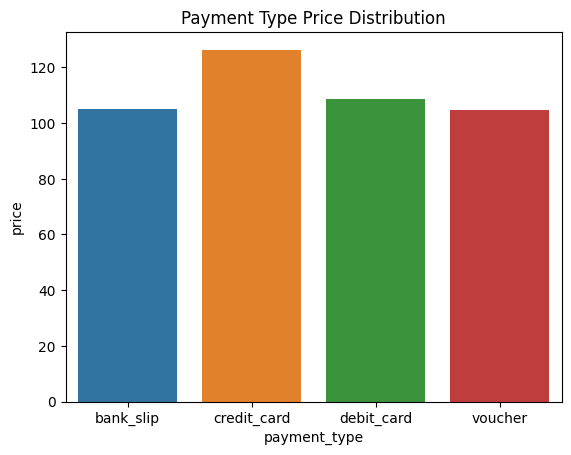

In [ ]:
plt.title('Payment Type Price Distribution')
sns.barplot(x='payment_type',y='price',data=payment_type_count,hue='payment_type')
plt.show()

In [ ]:
payment_type_price = combined.groupby("payment_installments").agg(
    count=("price","count"),
    price=("price", "mean")
).reset_index()

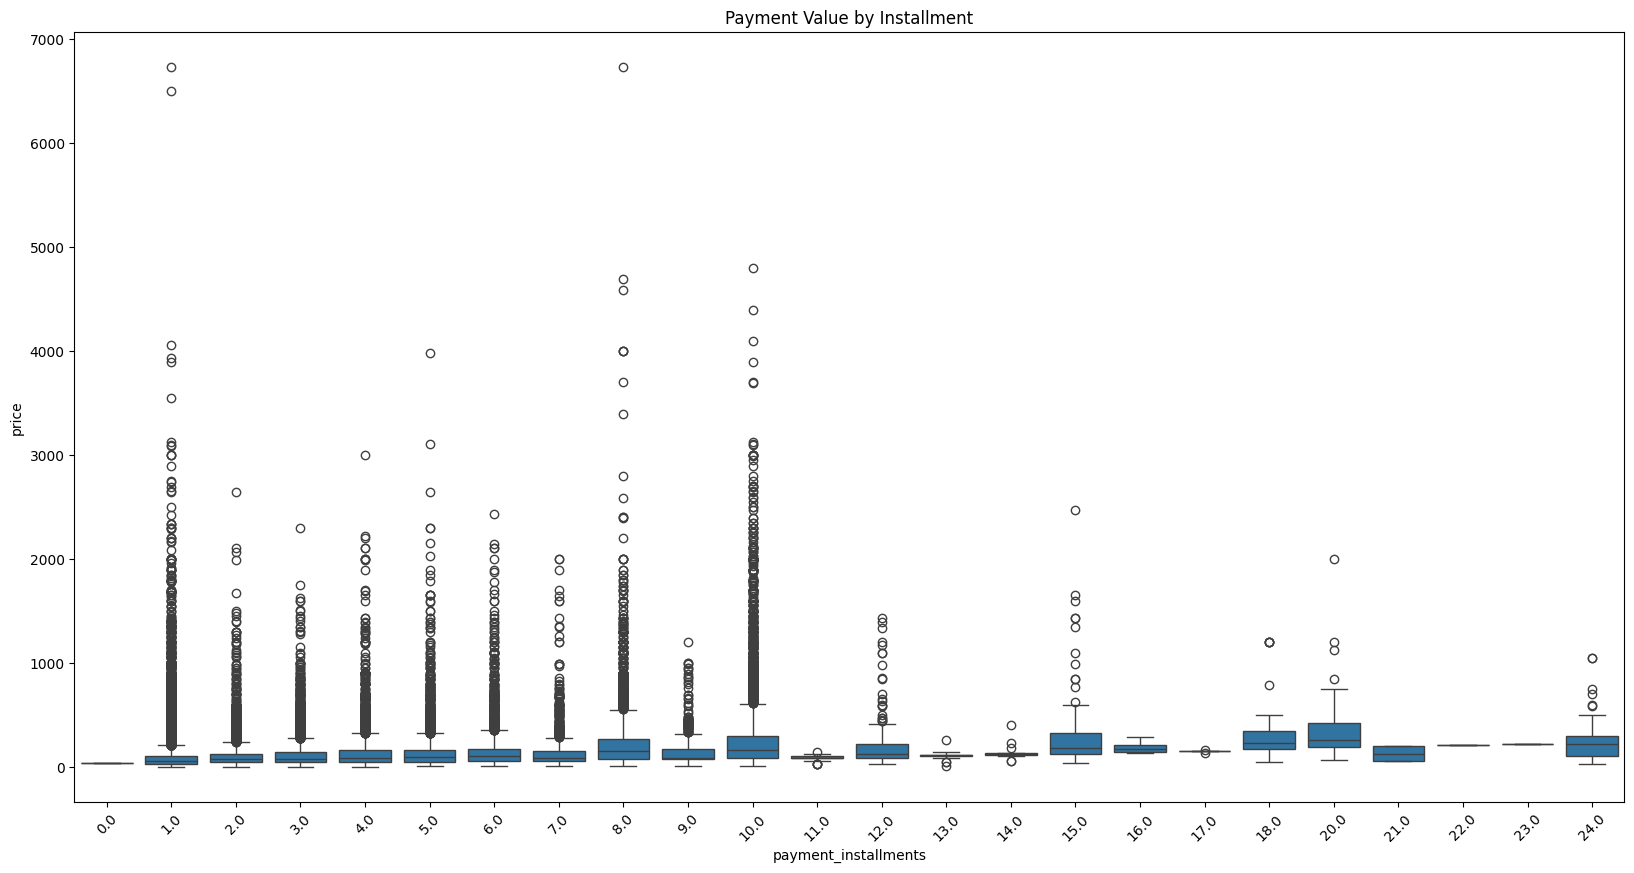

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=combined, x='payment_installments', y='price')
plt.title('Payment Value by Installment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
combined['deliver_delay_days'] = (
    combined['order_delivered_customer_date_x'] - combined['order_estimated_delivery_date_x']
).dt.days
combined['deliver_delay_days'].fillna(combined['deliver_delay_days'].max(), inplace=True)
combined['deliver_delay_days'].head()

,deliver_delay_days
0,-8.0
1,-8.0
2,-8.0
3,-6.0
4,-18.0


In [ ]:
def bucket_delay(days):
    if pd.isna(days):
        return 'Not Delivered'
    elif days < -3:
        return 'Very Early'
    elif days < 0:
        return 'Early'
    elif days == 0:
        return 'On Time'
    elif days <= 3:
        return 'Slightly Late'
    elif days <= 7:
        return 'Late'
    else:
        return 'Very Late'

combined['delay_bucket'] = combined['deliver_delay_days'].apply(bucket_delay)

avg_reviews = combined.groupby('delay_bucket')['review_score'].mean().reset_index()

bucket_order = ['Very Early', 'Early', 'On Time', 'Slightly Late', 'Late', 'Very Late', 'Not Delivered']

<Axes: title={'center': 'Delivery Delay by State'}, xlabel='customer_state', ylabel='deliver_delay_days'>

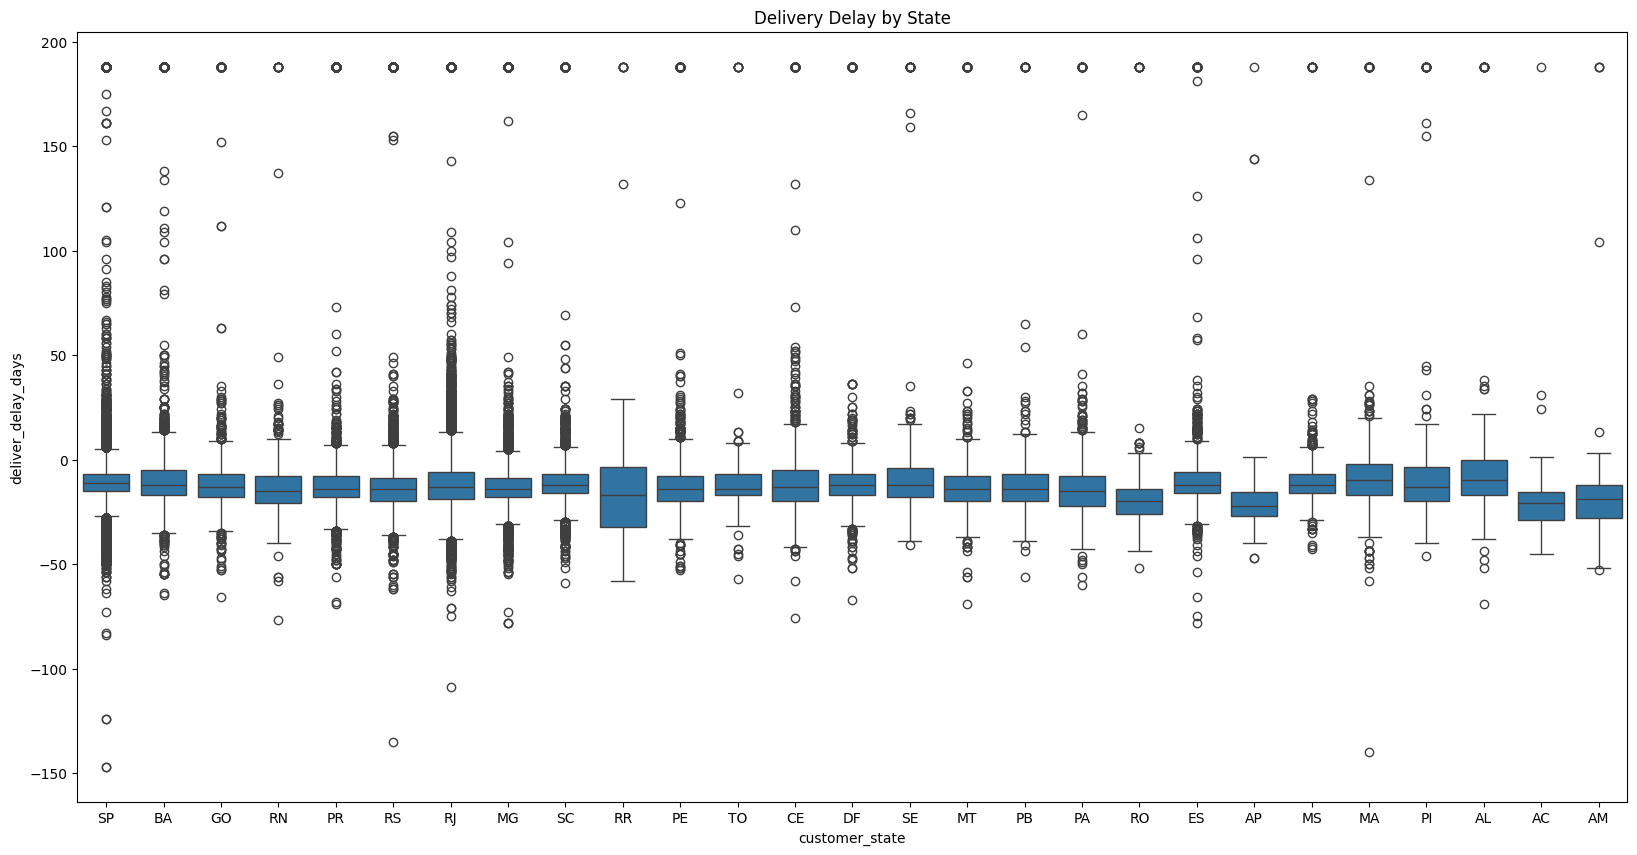

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Delivery Delay by State')
sns.boxplot(data=combined, x='customer_state', y='deliver_delay_days')

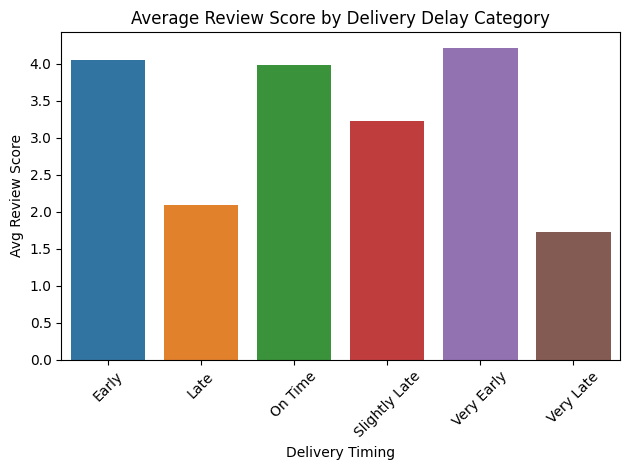

In [ ]:
sns.barplot(data=avg_reviews, x='delay_bucket', y='review_score',hue='delay_bucket')
plt.title('Average Review Score by Delivery Delay Category')
plt.ylabel('Avg Review Score')
plt.xlabel('Delivery Timing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

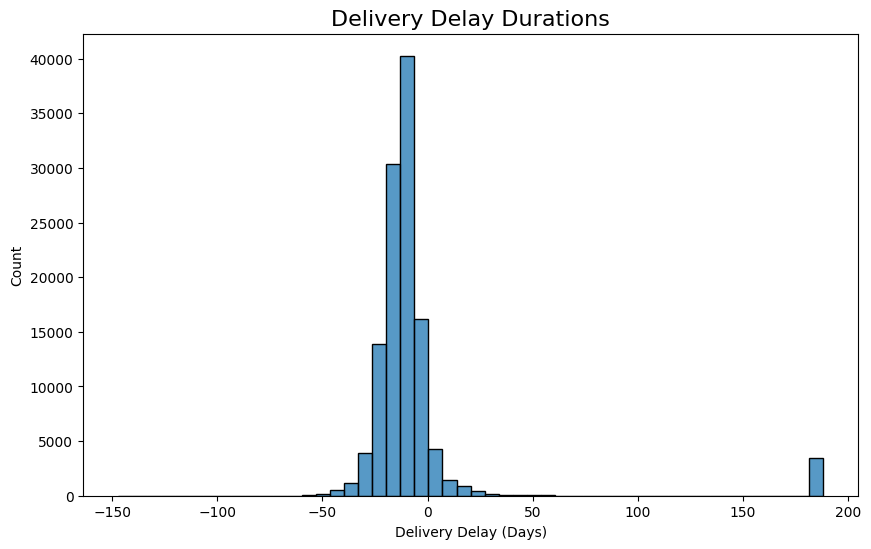

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=combined, x="deliver_delay_days", bins=50)
plt.title("Delivery Delay Durations", fontsize=16)
plt.xlabel("Delivery Delay (Days)")
plt.show()

In [ ]:
# Top Selling Product Categories
seller_sales = combined.groupby('product_category_name_english')['product_id'].count().reset_index()
seller_sales=seller_sales.sort_values(by='product_id',ascending=False).head(10)

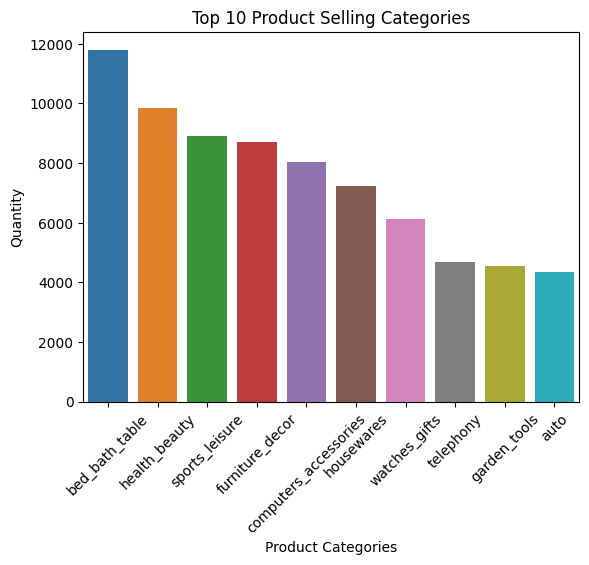

In [ ]:
sns.barplot(x='product_category_name_english',y='product_id',data=seller_sales,hue='product_category_name_english')
plt.xticks(rotation=45)
plt.title("Top 10 Product Selling Categories")
plt.ylabel("Quantity")
plt.xlabel("Product Categories")
plt.show()

In [ ]:
# Top 20 State Purchase
combined['Total_Sales']=combined['price']+combined['freight_value']
state_sales=combined.groupby('customer_state')['Total_Sales'].sum().reset_index().sort_values(by='Total_Sales',ascending=False).head(20)

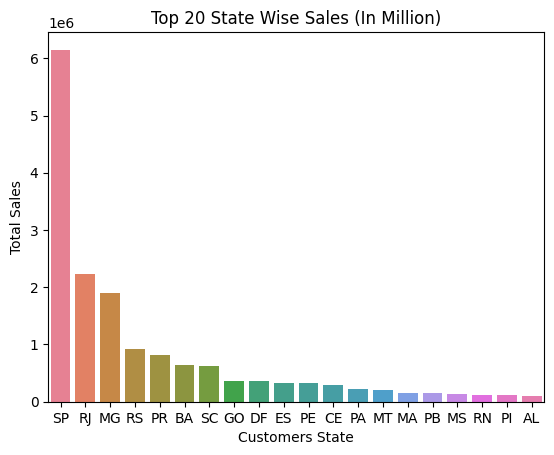

In [ ]:
sns.barplot(x='customer_state',y='Total_Sales',data=state_sales,hue='customer_state')
plt.title("Top 20 State Wise Sales (In Million)")
plt.xlabel("Customers State")
plt.ylabel('Total Sales')
plt.show()

#Hypothesis Tesing

In [ ]:
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, kruskal
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, ttest_ind, chi2_contingency, f_oneway

#Delay vs Customber Location Hypothesis


**Null Hypothesis (H₀):** Delivery delays are the same across all customer locations.  
**Alternate Hypothesis (H₁):** Delivery delays differ significantly across customer locations.
**Appropriate Test:**  
- **One-way ANOVA** → if delivery delays are approximately normally distributed across locations with similar variances. \
**Significance Value = 0.05**

In [ ]:
df = combined[["customer_state", "deliver_delay_days"]].dropna().copy()

low, high = df["deliver_delay_days"].quantile([0.01, 0.99])
df["delay_clip"] = df["deliver_delay_days"].clip(lower=low, upper=high)

df["is_late"] = df["deliver_delay_days"] > 0

state_counts = df["customer_state"].value_counts()
keep_states = state_counts[state_counts >= 200].index
df = df[df["customer_state"].isin(keep_states)].copy()

df["customer_state"] = df["customer_state"].astype("category")
df.head()

,customer_state,deliver_delay_days,delay_clip,is_late
0,SP,-8.0,-8.0,False
1,SP,-8.0,-8.0,False
2,SP,-8.0,-8.0,False
3,BA,-6.0,-6.0,False
4,GO,-18.0,-18.0,False


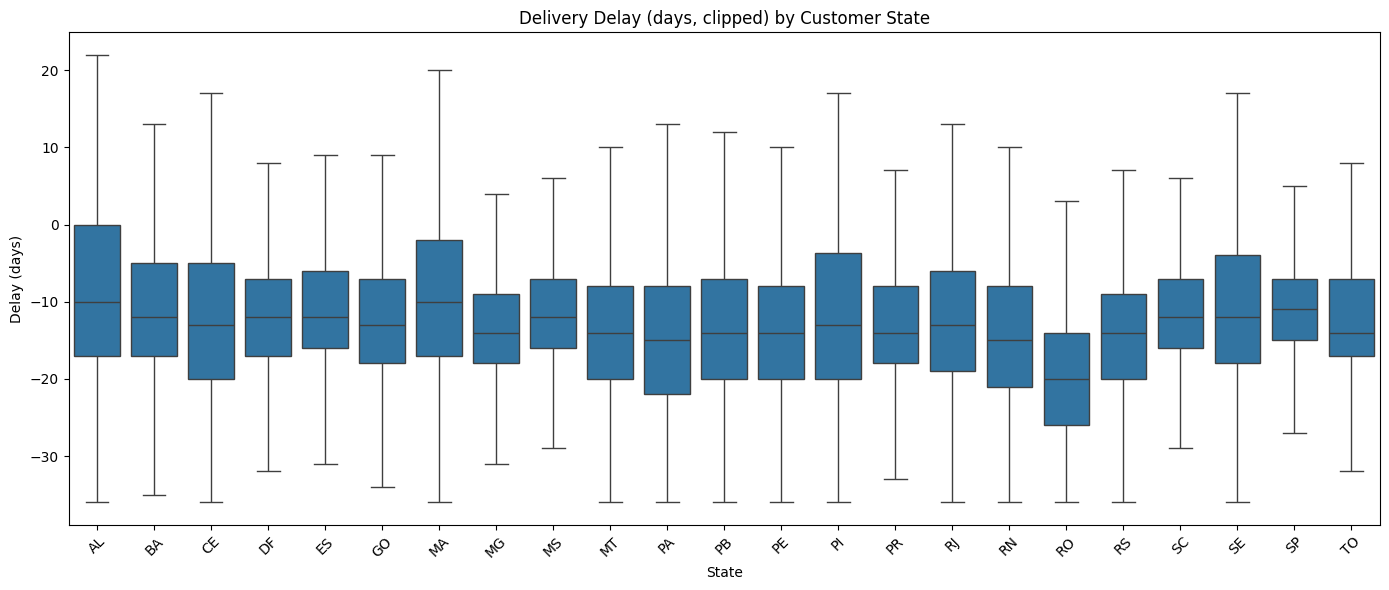

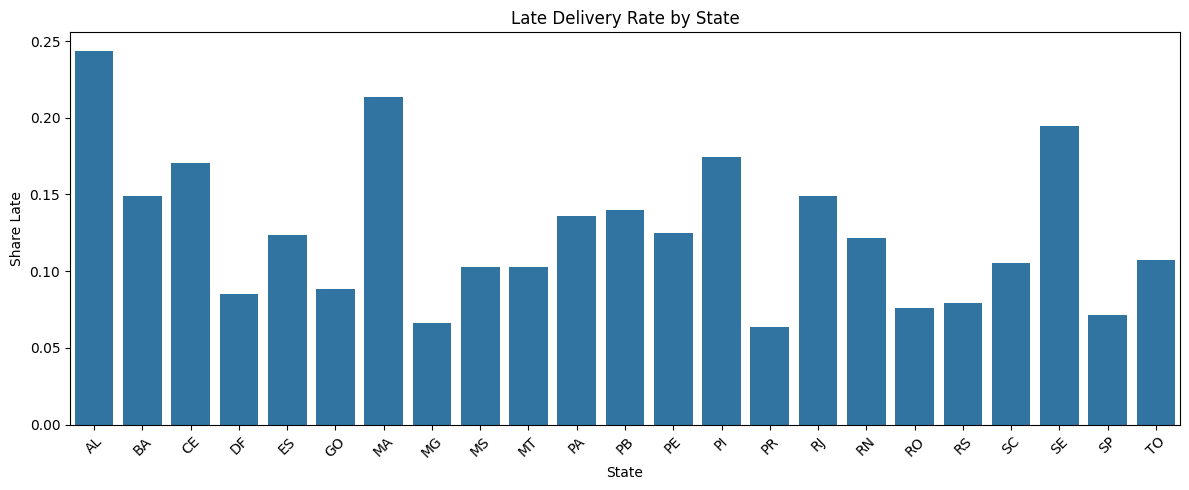

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="customer_state", y="delay_clip", showfliers=False)
plt.title("Delivery Delay (days, clipped) by Customer State")
plt.xlabel("State"); plt.ylabel("Delay (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

late_rate = df.groupby("customer_state")["is_late"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=late_rate.index, y=late_rate.values)
plt.title("Late Delivery Rate by State")
plt.ylabel("Share Late"); plt.xlabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
model = ols("deliver_delay_days ~ C(customer_state)", data=df).fit(cov_type="HC1")
anova = anova_lm(model, typ=2)  # global test on state dummies

print(anova)
print("\nModel F p-value (state effect):", anova["PR(>F)"].iloc[0])
print("\nAdj R^2:", model.rsquared_adj)

                         sum_sq        df         F        PR(>F)
C(customer_state)  3.679140e+05      22.0  13.63677  1.437263e-50
Residual           1.435631e+08  117066.0       NaN           NaN

Model F p-value (state effect): 1.437263120285294e-50

Adj R^2: 0.0022720355779211054


In [ ]:
# For OLS ANOVA p-value:
alpha = 0.05
p_anova = anova["PR(>F)"].iloc[0]
decision_ols = "REJECT H0 (state has effect)" if p_anova < alpha else "FAIL TO REJECT H0"

print(f"\nDecision at α={alpha}:")
print(f"  OLS ANOVA:      {decision_ols}")


Decision at α=0.05:
  OLS ANOVA:      REJECT H0 (state has effect)


## Sales Volume vs. Weekdays & Weekends Hypothesis

**Null Hypothesis:** Sales volumes are the same between weekdays and weekends.  
**Alternate Hypothesis:** Sales volumes differ significantly between weekdays and weekends.  
**Significance Value = 0.05**

In [ ]:
combined["is_weekday"] = combined["order_day_of_week"] < 5
day_df = (
        combined.groupby(["order_purchase_timestamp_x", "is_weekday"])
        .size()
        .rename("items_sold")
        .reset_index())
day_df.head()

,order_purchase_timestamp_x,is_weekday,items_sold
0,2016-09-04 21:15:19,False,2
1,2016-09-05 00:15:34,True,1
2,2016-09-13 15:24:19,True,1
3,2016-09-15 12:16:38,True,3
4,2016-10-02 22:07:52,False,1


<Axes: xlabel='is_weekday', ylabel='items_sold'>

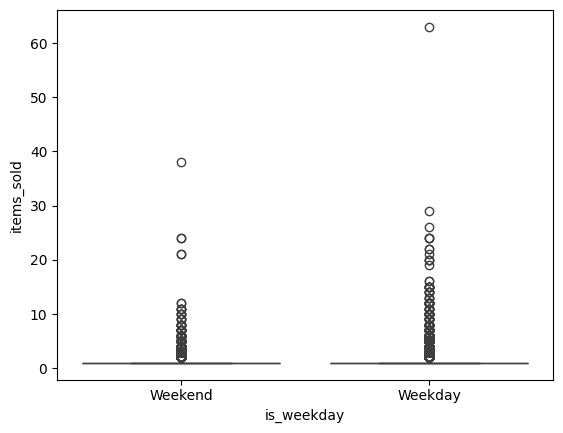

In [ ]:
sns.boxplot(
    data=day_df.replace({"is_weekday": {True: "Weekday", False: "Weekend"}}),
    x="is_weekday", y="items_sold")

In [ ]:
weekdays = day_df.loc[day_df["is_weekday"], "items_sold"].to_numpy()
weekend = day_df.loc[~day_df["is_weekday"], "items_sold"].to_numpy()

print(f"Weekday days: {len(weekdays)}, Weekend days: {len(weekend)}")
print(f"Weekday mean={weekdays.mean()}, median={np.median(weekdays)}")
print(f"Weekend mean={weekend.mean()}, median={np.median(weekend)}")

Weekday days: 75120, Weekend days: 22387
Weekday mean=1.2100372736954206, median=1.0
Weekend mean=1.1877428864966275, median=1.0


In [ ]:
t_stat, p_t = ttest_ind(weekdays, weekend, equal_var=False)
print(f"Welch t-test: t={t_stat:.3f}, p-value={p_t:.4g}")

Welch t-test: t=3.975, p-value=7.042e-05


In [ ]:
alpha = 0.05
decision_t = "REJECT H0 (means differ)" if p_t < alpha else "FAIL TO REJECT H0"

print(f"\nDecision at α={alpha}:")


Decision at α=0.05:


## Review Score vs. Delivery Delays Hypothesis

**Null Hypothesis:** Delivery delays do not affect the review scores    
**Alternate Hypothesis:** Delivery delays do affect the review score
**Significance Value= 0.05**


In [ ]:
delay_review = combined[["deliver_delay_days", "review_score"]].dropna().reset_index()
delay_review["is_late"] = delay_review["deliver_delay_days"] > 0

X = delay_review["deliver_delay_days"]
y = delay_review["review_score"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           review_score   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                 1.389e+04
Date:                Thu, 22 Jan 2026   Prob (F-statistic):               0.00
Time:                        13:11:19   Log-Likelihood:            -1.9809e+05
No. Observations:              116499   AIC:                         3.962e+05
Df Residuals:                  116497   BIC:                         3.962e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.9288      0

In [ ]:
late = delay_review.loc[delay_review["is_late"], "review_score"].to_numpy()
on_time = delay_review.loc[~delay_review["is_late"], "review_score"].to_numpy()

print(f"Late deliveries: {len(late)}, On time deliveries: {len(on_time)}")
print(f"Late deliveries mean={late.mean()}, median={np.median(late)}")
print(f"On time deliveries mean={on_time.mean()}, median={np.median(on_time)}")

Late deliveries: 10624, On time deliveries: 105875
Late deliveries mean=2.0968561746987953, median=1.0
On time deliveries mean=4.205733175914994, median=5.0


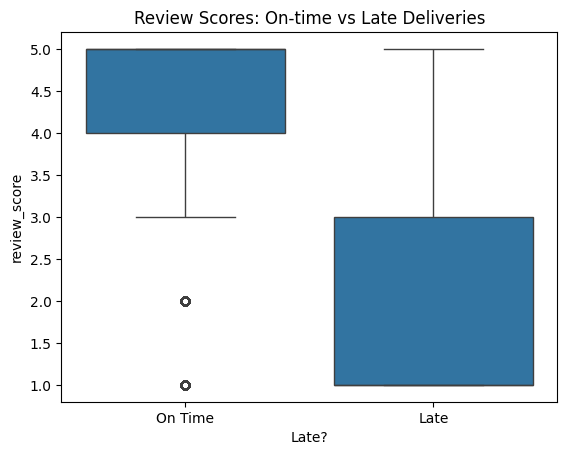

In [ ]:
sns.boxplot(data=delay_review,
            x="is_late",
            y="review_score")

plt.xticks([0,1], ["On Time", "Late"])
plt.xlabel("Late?")
plt.title("Review Scores: On-time vs Late Deliveries")
plt.show()

In [ ]:
alpha = 0.05
decision_reg = "REJECT H0 (delay impacts reviews)" if model.pvalues["deliver_delay_days"] < alpha else "FAIL TO REJECT H0"
print(f"\nDecision at α={alpha}:")
print(f"  Linear Regression: {decision_reg}")



Decision at α=0.05:
  Linear Regression: REJECT H0 (delay impacts reviews)


In [ ]:

df = pd.DataFrame(combined)
df.to_excel("Final_e-commerce.xlsx", index=False)

In [ ]:
from google.colab import files
files.download("Final_e-commerce.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>